In [3]:
import sigpy.plot as pl
import numpy as np
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import scipy.io
from torch.autograd import Variable
% matplotlib notebook

In [4]:
import UFNet

In [5]:
mrf_dict = scipy.io.loadmat('/mikRAID/jtamir/projects/MRF_direct_contrast_synthesis/data/DictionaryAndSequenceInfo/fp_dictionary.mat')
# print(MRF_dic.keys())
fp_dict = mrf_dict['fp_dict']
t1_list = mrf_dict['t1_list']
t2_list = mrf_dict['t2_list']
N_dict = t1_list.shape[0]

In [6]:
def read_flipangles(flip_file):
    f = open(flip_file)
    flips =  [float(a) for a in f.readlines()]
    f.close()
    return np.array(flips)
flips = read_flipangles('/mikRAID/jtamir/projects/MRF_direct_contrast_synthesis/data/DictionaryAndSequenceInfo/flipangles.txt')
N_flip = len(flips)

In [7]:
fp_dic = np.hstack(list(fp_dict[0][0])).reshape((N_flip, 2, N_dict)).transpose((0, 2, 1))
fp_dic = fp_dic[:,:,0] + 1j * fp_dic[:,:,1]
print(fp_dic.shape)

(500, 22031)


In [8]:
fp_train = fp_dic.transpose(1,0)[:,None,:]

In [9]:
fp_train.shape

(22031, 1, 500)

In [10]:
nd = 3

In [11]:
p = np.random.rand(22031,nd)
p_norm = np.linalg.norm(p,axis=1)
p_normal = p/p_norm[None,:].T
B_tensor = torch.tensor(p_normal)
B_tensor_cuda = B_tensor.cuda()
fp_train_cuda = torch.tensor(abs(fp_train)).cuda()

<IPython.core.display.Javascript object>


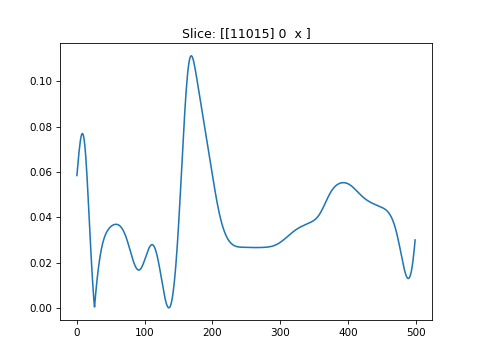

In [12]:
pl.LinePlot(fp_train_cuda.detach().cpu().numpy())

In [13]:
net1 = UFNet.PixelNet(1).cuda()

In [14]:
mac = fp_train_cuda.max(dim=2)
fp_train_cuda = fp_train_cuda[:,0,:]/mac[0]
fp_train_cuda = fp_train_cuda.unsqueeze(1)

<IPython.core.display.Javascript object>


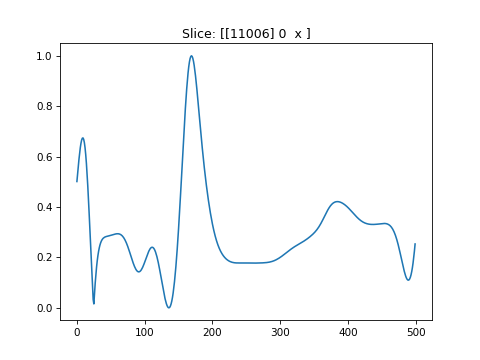

In [15]:
pl.LinePlot(fp_train_cuda.detach().cpu().numpy())

<IPython.core.display.Javascript object>


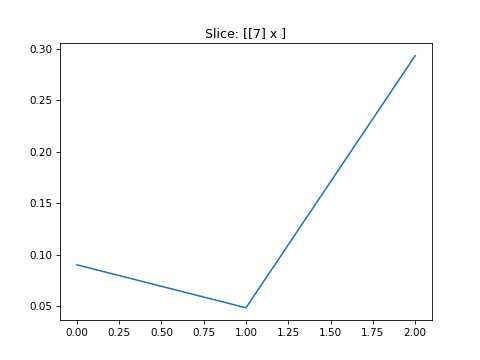

In [40]:
pl.LinePlot(b.detach().cpu().numpy())

<IPython.core.display.Javascript object>


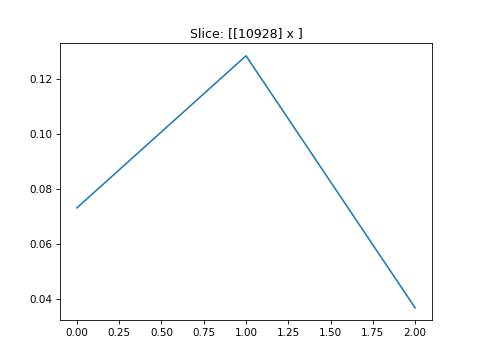

In [39]:
pl.LinePlot(B_tensor_cuda.detach().cpu().numpy())

In [17]:
fp_train_cuda.shape

torch.Size([22031, 1, 500])

In [18]:
B_tensor_cuda.shape

torch.Size([22031, 3])

In [19]:
fp_train_cuda

tensor([[[0.1097, 0.1276, 0.1411,  ..., 0.0840, 0.0932, 0.1036]],

        [[0.0977, 0.1288, 0.1432,  ..., 0.0852, 0.0946, 0.1052]],

        [[0.0977, 0.1288, 0.1432,  ..., 0.0852, 0.0946, 0.1052]],

        ...,

        [[0.4711, 0.5127, 0.5543,  ..., 0.1713, 0.1939, 0.2186]],

        [[0.4691, 0.5105, 0.5520,  ..., 0.1711, 0.1937, 0.2183]],

        [[0.4672, 0.5084, 0.5497,  ..., 0.1708, 0.1935, 0.2181]]],
       device='cuda:0')

In [40]:
net = UFNet.PixelNet(1).cuda()
with torch.no_grad(): 
    for j in range(22031):
        inp = fp_train_cuda[j,:,:].unsqueeze(0)
        out = net(inp)
        B_tensor_cuda[j,:] = out
        print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113


3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928


5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698


7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
7340
7341
7342
7343
7344
7345
7346
7347
7348
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
7400
7401
7402
7403
7404
7405
7406
7407
7408
7409
7410
7411
7412
7413
7414
7415
7416
7417
7418
7419
7420
7421
7422
7423
7424
7425
7426
7427
7428
7429
7430
7431
7432
7433
7434
7435
7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7454


9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
9129
9130
9131
9132
9133
9134
9135
9136
9137
9138
9139
9140
9141
9142
9143
9144
9145
9146
9147
9148
9149
9150
9151
9152
9153
9154
9155
9156
9157
9158
9159
9160
9161
9162
9163
9164
9165
9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182
9183
9184
9185
9186
9187
9188
9189
9190
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201
9202
9203
9204
9205
9206
9207
9208
9209
9210
9211
9212
9213
9214
9215
9216
9217
9218
9219
9220
9221
9222
9223
9224
9225
9226
9227
9228
9229
9230
9231
9232
9233
9234
9235
9236
9237
9238
9239
9240
9241
9242
9243
9244
9245
9246
9247
9248
9249
9250
9251
9252
9253
9254
9255
9256
9257
9258
9259
9260
9261
9262
9263
9264
9265
9266
9267
9268
9269
9270
9271
9272
9273
9274
9275
9276
9277
9278
9279
9280
9281
9282
9283
9284
9285
9286
9287
9288
9289
9290
9291
9292
9293
9294
9295
9296
9297
9298
9299
9300
9301
9302
9303


10772
10773
10774
10775
10776
10777
10778
10779
10780
10781
10782
10783
10784
10785
10786
10787
10788
10789
10790
10791
10792
10793
10794
10795
10796
10797
10798
10799
10800
10801
10802
10803
10804
10805
10806
10807
10808
10809
10810
10811
10812
10813
10814
10815
10816
10817
10818
10819
10820
10821
10822
10823
10824
10825
10826
10827
10828
10829
10830
10831
10832
10833
10834
10835
10836
10837
10838
10839
10840
10841
10842
10843
10844
10845
10846
10847
10848
10849
10850
10851
10852
10853
10854
10855
10856
10857
10858
10859
10860
10861
10862
10863
10864
10865
10866
10867
10868
10869
10870
10871
10872
10873
10874
10875
10876
10877
10878
10879
10880
10881
10882
10883
10884
10885
10886
10887
10888
10889
10890
10891
10892
10893
10894
10895
10896
10897
10898
10899
10900
10901
10902
10903
10904
10905
10906
10907
10908
10909
10910
10911
10912
10913
10914
10915
10916
10917
10918
10919
10920
10921
10922
10923
10924
10925
10926
10927
10928
10929
10930
10931
10932
10933
10934
10935
10936
10937
1093

12214
12215
12216
12217
12218
12219
12220
12221
12222
12223
12224
12225
12226
12227
12228
12229
12230
12231
12232
12233
12234
12235
12236
12237
12238
12239
12240
12241
12242
12243
12244
12245
12246
12247
12248
12249
12250
12251
12252
12253
12254
12255
12256
12257
12258
12259
12260
12261
12262
12263
12264
12265
12266
12267
12268
12269
12270
12271
12272
12273
12274
12275
12276
12277
12278
12279
12280
12281
12282
12283
12284
12285
12286
12287
12288
12289
12290
12291
12292
12293
12294
12295
12296
12297
12298
12299
12300
12301
12302
12303
12304
12305
12306
12307
12308
12309
12310
12311
12312
12313
12314
12315
12316
12317
12318
12319
12320
12321
12322
12323
12324
12325
12326
12327
12328
12329
12330
12331
12332
12333
12334
12335
12336
12337
12338
12339
12340
12341
12342
12343
12344
12345
12346
12347
12348
12349
12350
12351
12352
12353
12354
12355
12356
12357
12358
12359
12360
12361
12362
12363
12364
12365
12366
12367
12368
12369
12370
12371
12372
12373
12374
12375
12376
12377
12378
12379
1238

13633
13634
13635
13636
13637
13638
13639
13640
13641
13642
13643
13644
13645
13646
13647
13648
13649
13650
13651
13652
13653
13654
13655
13656
13657
13658
13659
13660
13661
13662
13663
13664
13665
13666
13667
13668
13669
13670
13671
13672
13673
13674
13675
13676
13677
13678
13679
13680
13681
13682
13683
13684
13685
13686
13687
13688
13689
13690
13691
13692
13693
13694
13695
13696
13697
13698
13699
13700
13701
13702
13703
13704
13705
13706
13707
13708
13709
13710
13711
13712
13713
13714
13715
13716
13717
13718
13719
13720
13721
13722
13723
13724
13725
13726
13727
13728
13729
13730
13731
13732
13733
13734
13735
13736
13737
13738
13739
13740
13741
13742
13743
13744
13745
13746
13747
13748
13749
13750
13751
13752
13753
13754
13755
13756
13757
13758
13759
13760
13761
13762
13763
13764
13765
13766
13767
13768
13769
13770
13771
13772
13773
13774
13775
13776
13777
13778
13779
13780
13781
13782
13783
13784
13785
13786
13787
13788
13789
13790
13791
13792
13793
13794
13795
13796
13797
13798
1379

15062
15063
15064
15065
15066
15067
15068
15069
15070
15071
15072
15073
15074
15075
15076
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15087
15088
15089
15090
15091
15092
15093
15094
15095
15096
15097
15098
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
15109
15110
15111
15112
15113
15114
15115
15116
15117
15118
15119
15120
15121
15122
15123
15124
15125
15126
15127
15128
15129
15130
15131
15132
15133
15134
15135
15136
15137
15138
15139
15140
15141
15142
15143
15144
15145
15146
15147
15148
15149
15150
15151
15152
15153
15154
15155
15156
15157
15158
15159
15160
15161
15162
15163
15164
15165
15166
15167
15168
15169
15170
15171
15172
15173
15174
15175
15176
15177
15178
15179
15180
15181
15182
15183
15184
15185
15186
15187
15188
15189
15190
15191
15192
15193
15194
15195
15196
15197
15198
15199
15200
15201
15202
15203
15204
15205
15206
15207
15208
15209
15210
15211
15212
15213
15214
15215
15216
15217
15218
15219
15220
15221
15222
15223
15224
15225
15226
15227
1522

16536
16537
16538
16539
16540
16541
16542
16543
16544
16545
16546
16547
16548
16549
16550
16551
16552
16553
16554
16555
16556
16557
16558
16559
16560
16561
16562
16563
16564
16565
16566
16567
16568
16569
16570
16571
16572
16573
16574
16575
16576
16577
16578
16579
16580
16581
16582
16583
16584
16585
16586
16587
16588
16589
16590
16591
16592
16593
16594
16595
16596
16597
16598
16599
16600
16601
16602
16603
16604
16605
16606
16607
16608
16609
16610
16611
16612
16613
16614
16615
16616
16617
16618
16619
16620
16621
16622
16623
16624
16625
16626
16627
16628
16629
16630
16631
16632
16633
16634
16635
16636
16637
16638
16639
16640
16641
16642
16643
16644
16645
16646
16647
16648
16649
16650
16651
16652
16653
16654
16655
16656
16657
16658
16659
16660
16661
16662
16663
16664
16665
16666
16667
16668
16669
16670
16671
16672
16673
16674
16675
16676
16677
16678
16679
16680
16681
16682
16683
16684
16685
16686
16687
16688
16689
16690
16691
16692
16693
16694
16695
16696
16697
16698
16699
16700
16701
1670

18009
18010
18011
18012
18013
18014
18015
18016
18017
18018
18019
18020
18021
18022
18023
18024
18025
18026
18027
18028
18029
18030
18031
18032
18033
18034
18035
18036
18037
18038
18039
18040
18041
18042
18043
18044
18045
18046
18047
18048
18049
18050
18051
18052
18053
18054
18055
18056
18057
18058
18059
18060
18061
18062
18063
18064
18065
18066
18067
18068
18069
18070
18071
18072
18073
18074
18075
18076
18077
18078
18079
18080
18081
18082
18083
18084
18085
18086
18087
18088
18089
18090
18091
18092
18093
18094
18095
18096
18097
18098
18099
18100
18101
18102
18103
18104
18105
18106
18107
18108
18109
18110
18111
18112
18113
18114
18115
18116
18117
18118
18119
18120
18121
18122
18123
18124
18125
18126
18127
18128
18129
18130
18131
18132
18133
18134
18135
18136
18137
18138
18139
18140
18141
18142
18143
18144
18145
18146
18147
18148
18149
18150
18151
18152
18153
18154
18155
18156
18157
18158
18159
18160
18161
18162
18163
18164
18165
18166
18167
18168
18169
18170
18171
18172
18173
18174
1817

19442
19443
19444
19445
19446
19447
19448
19449
19450
19451
19452
19453
19454
19455
19456
19457
19458
19459
19460
19461
19462
19463
19464
19465
19466
19467
19468
19469
19470
19471
19472
19473
19474
19475
19476
19477
19478
19479
19480
19481
19482
19483
19484
19485
19486
19487
19488
19489
19490
19491
19492
19493
19494
19495
19496
19497
19498
19499
19500
19501
19502
19503
19504
19505
19506
19507
19508
19509
19510
19511
19512
19513
19514
19515
19516
19517
19518
19519
19520
19521
19522
19523
19524
19525
19526
19527
19528
19529
19530
19531
19532
19533
19534
19535
19536
19537
19538
19539
19540
19541
19542
19543
19544
19545
19546
19547
19548
19549
19550
19551
19552
19553
19554
19555
19556
19557
19558
19559
19560
19561
19562
19563
19564
19565
19566
19567
19568
19569
19570
19571
19572
19573
19574
19575
19576
19577
19578
19579
19580
19581
19582
19583
19584
19585
19586
19587
19588
19589
19590
19591
19592
19593
19594
19595
19596
19597
19598
19599
19600
19601
19602
19603
19604
19605
19606
19607
1960

20907
20908
20909
20910
20911
20912
20913
20914
20915
20916
20917
20918
20919
20920
20921
20922
20923
20924
20925
20926
20927
20928
20929
20930
20931
20932
20933
20934
20935
20936
20937
20938
20939
20940
20941
20942
20943
20944
20945
20946
20947
20948
20949
20950
20951
20952
20953
20954
20955
20956
20957
20958
20959
20960
20961
20962
20963
20964
20965
20966
20967
20968
20969
20970
20971
20972
20973
20974
20975
20976
20977
20978
20979
20980
20981
20982
20983
20984
20985
20986
20987
20988
20989
20990
20991
20992
20993
20994
20995
20996
20997
20998
20999
21000
21001
21002
21003
21004
21005
21006
21007
21008
21009
21010
21011
21012
21013
21014
21015
21016
21017
21018
21019
21020
21021
21022
21023
21024
21025
21026
21027
21028
21029
21030
21031
21032
21033
21034
21035
21036
21037
21038
21039
21040
21041
21042
21043
21044
21045
21046
21047
21048
21049
21050
21051
21052
21053
21054
21055
21056
21057
21058
21059
21060
21061
21062
21063
21064
21065
21066
21067
21068
21069
21070
21071
21072
2107

In [33]:
22031/16

1376.9375

In [35]:
int(n_dictionary/batchsize)

1376

In [41]:
# Here we train the network
n_dictionary = 22031
n_dimension = 3
tau = 1
epochs = 100
n_step = int(n_dictionary/batchsize)
# net = UFNet.PixelNet(1).cuda()
optimizer = torch.optim.Adam(net.parameters(),
                          lr=0.002)
criterion = torch.nn.CrossEntropyLoss()
loss_all = list([])
index_dic = np.random.permutation(n_dictionary)
batchsize = 16
num = np.floor(n_dictionary/batchsize).astype(int)

for epoch in range(epochs):
    index_dic = np.random.permutation(n_dictionary)
    net.train()
    epoch_loss = 0
    optimizer.zero_grad()
    print("Starting Epoch: %d" %(epoch+1))
    for index in range(n_step):
        ipd = index_dic[index*batchsize:(index+1)*batchsize]
        
        input_dic = fp_train_cuda[ipd,:,:]
        output_dic = net(input_dic)

        ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
#             print(output_dic)
#             B_tensor_cuda.requires_grad = False
        output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
#             print(output_dic.requires_grad)
#             print(output_dic.shape)
        loss = criterion(output_dic1,torch.LongTensor(ipd).cuda())
        B_tensor_cuda[ipd,:] = output_dic.double()
        if index % 100 == 0:
            print(loss.item())
            loss_all.append(loss.item())
        epoch_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Starting Epoch: 1
10.000056266784668
9.985313415527344
9.972616195678711
9.96004581451416
9.947225570678711
9.934063911437988
9.920710563659668
9.907238006591797
9.89354419708252
9.879638671875
9.86559009552002
9.851272583007812
9.836788177490234
9.822065353393555
Starting Epoch: 2
9.99843692779541
9.995261192321777
9.98936939239502
9.985228538513184
9.990226745605469
9.98475456237793
9.986434936523438
9.986842155456543
9.98576545715332
9.984564781188965
9.984356880187988
9.98394775390625
9.984719276428223
9.983323097229004
Starting Epoch: 3
9.994048118591309
9.969651222229004
9.967536926269531
9.95913028717041
9.959551811218262
9.958833694458008
9.952653884887695
9.956089973449707
9.957537651062012
9.956571578979492
9.95231819152832
9.954976081848145
9.9569673538208
9.953286170959473
Starting Epoch: 4
9.958236694335938
9.942277908325195
9.956777572631836
9.94371223449707
9.937663078308105
9.946596145629883
9.93637466430664
9.945114135742188
9.944977760314941
9.948356628417969
9.939262

9.937711715698242
9.93970775604248
9.939691543579102


KeyboardInterrupt: 

In [42]:
B_tensor_test = B_tensor_cuda*0

<IPython.core.display.Javascript object>


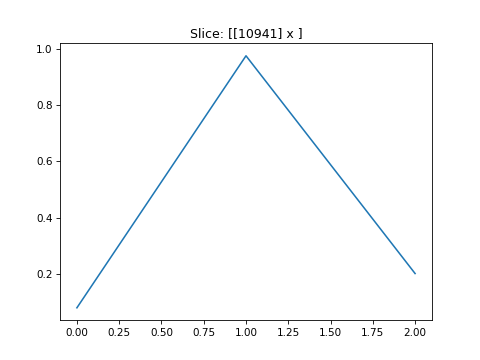

In [44]:
pl.LinePlot(B_tensor_test.detach().cpu().numpy())

In [43]:
with torch.no_grad(): 
    for j in range(22031):
        inp = fp_train_cuda[j,:,:].unsqueeze(0)
        out = net(inp)
        B_tensor_test[j,:] = out
        print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123


3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945


5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774


7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
7400
7401
7402
7403
7404
7405
7406
7407
7408
7409
7410
7411
7412
7413
7414
7415
7416
7417
7418
7419
7420
7421
7422
7423
7424
7425
7426
7427
7428
7429
7430
7431
7432
7433
7434
7435
7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465
7466
7467
7468
7469
7470
7471
7472
7473
7474
7475
7476
7477
7478
7479
7480
7481
7482
7483
7484
7485
7486
7487
7488
7489
7490
7491
7492
7493
7494
7495
7496
7497
7498
7499
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509
7510
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7541
7542
7543
7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572


9184
9185
9186
9187
9188
9189
9190
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201
9202
9203
9204
9205
9206
9207
9208
9209
9210
9211
9212
9213
9214
9215
9216
9217
9218
9219
9220
9221
9222
9223
9224
9225
9226
9227
9228
9229
9230
9231
9232
9233
9234
9235
9236
9237
9238
9239
9240
9241
9242
9243
9244
9245
9246
9247
9248
9249
9250
9251
9252
9253
9254
9255
9256
9257
9258
9259
9260
9261
9262
9263
9264
9265
9266
9267
9268
9269
9270
9271
9272
9273
9274
9275
9276
9277
9278
9279
9280
9281
9282
9283
9284
9285
9286
9287
9288
9289
9290
9291
9292
9293
9294
9295
9296
9297
9298
9299
9300
9301
9302
9303
9304
9305
9306
9307
9308
9309
9310
9311
9312
9313
9314
9315
9316
9317
9318
9319
9320
9321
9322
9323
9324
9325
9326
9327
9328
9329
9330
9331
9332
9333
9334
9335
9336
9337
9338
9339
9340
9341
9342
9343
9344
9345
9346
9347
9348
9349
9350
9351
9352
9353
9354
9355
9356
9357
9358
9359
9360
9361
9362
9363
9364
9365
9366
9367
9368
9369
9370
9371
9372
9373
9374
9375
9376
9377
9378
9379
9380
9381
9382
9383


10823
10824
10825
10826
10827
10828
10829
10830
10831
10832
10833
10834
10835
10836
10837
10838
10839
10840
10841
10842
10843
10844
10845
10846
10847
10848
10849
10850
10851
10852
10853
10854
10855
10856
10857
10858
10859
10860
10861
10862
10863
10864
10865
10866
10867
10868
10869
10870
10871
10872
10873
10874
10875
10876
10877
10878
10879
10880
10881
10882
10883
10884
10885
10886
10887
10888
10889
10890
10891
10892
10893
10894
10895
10896
10897
10898
10899
10900
10901
10902
10903
10904
10905
10906
10907
10908
10909
10910
10911
10912
10913
10914
10915
10916
10917
10918
10919
10920
10921
10922
10923
10924
10925
10926
10927
10928
10929
10930
10931
10932
10933
10934
10935
10936
10937
10938
10939
10940
10941
10942
10943
10944
10945
10946
10947
10948
10949
10950
10951
10952
10953
10954
10955
10956
10957
10958
10959
10960
10961
10962
10963
10964
10965
10966
10967
10968
10969
10970
10971
10972
10973
10974
10975
10976
10977
10978
10979
10980
10981
10982
10983
10984
10985
10986
10987
10988
1098

12265
12266
12267
12268
12269
12270
12271
12272
12273
12274
12275
12276
12277
12278
12279
12280
12281
12282
12283
12284
12285
12286
12287
12288
12289
12290
12291
12292
12293
12294
12295
12296
12297
12298
12299
12300
12301
12302
12303
12304
12305
12306
12307
12308
12309
12310
12311
12312
12313
12314
12315
12316
12317
12318
12319
12320
12321
12322
12323
12324
12325
12326
12327
12328
12329
12330
12331
12332
12333
12334
12335
12336
12337
12338
12339
12340
12341
12342
12343
12344
12345
12346
12347
12348
12349
12350
12351
12352
12353
12354
12355
12356
12357
12358
12359
12360
12361
12362
12363
12364
12365
12366
12367
12368
12369
12370
12371
12372
12373
12374
12375
12376
12377
12378
12379
12380
12381
12382
12383
12384
12385
12386
12387
12388
12389
12390
12391
12392
12393
12394
12395
12396
12397
12398
12399
12400
12401
12402
12403
12404
12405
12406
12407
12408
12409
12410
12411
12412
12413
12414
12415
12416
12417
12418
12419
12420
12421
12422
12423
12424
12425
12426
12427
12428
12429
12430
1243

13689
13690
13691
13692
13693
13694
13695
13696
13697
13698
13699
13700
13701
13702
13703
13704
13705
13706
13707
13708
13709
13710
13711
13712
13713
13714
13715
13716
13717
13718
13719
13720
13721
13722
13723
13724
13725
13726
13727
13728
13729
13730
13731
13732
13733
13734
13735
13736
13737
13738
13739
13740
13741
13742
13743
13744
13745
13746
13747
13748
13749
13750
13751
13752
13753
13754
13755
13756
13757
13758
13759
13760
13761
13762
13763
13764
13765
13766
13767
13768
13769
13770
13771
13772
13773
13774
13775
13776
13777
13778
13779
13780
13781
13782
13783
13784
13785
13786
13787
13788
13789
13790
13791
13792
13793
13794
13795
13796
13797
13798
13799
13800
13801
13802
13803
13804
13805
13806
13807
13808
13809
13810
13811
13812
13813
13814
13815
13816
13817
13818
13819
13820
13821
13822
13823
13824
13825
13826
13827
13828
13829
13830
13831
13832
13833
13834
13835
13836
13837
13838
13839
13840
13841
13842
13843
13844
13845
13846
13847
13848
13849
13850
13851
13852
13853
13854
1385

15113
15114
15115
15116
15117
15118
15119
15120
15121
15122
15123
15124
15125
15126
15127
15128
15129
15130
15131
15132
15133
15134
15135
15136
15137
15138
15139
15140
15141
15142
15143
15144
15145
15146
15147
15148
15149
15150
15151
15152
15153
15154
15155
15156
15157
15158
15159
15160
15161
15162
15163
15164
15165
15166
15167
15168
15169
15170
15171
15172
15173
15174
15175
15176
15177
15178
15179
15180
15181
15182
15183
15184
15185
15186
15187
15188
15189
15190
15191
15192
15193
15194
15195
15196
15197
15198
15199
15200
15201
15202
15203
15204
15205
15206
15207
15208
15209
15210
15211
15212
15213
15214
15215
15216
15217
15218
15219
15220
15221
15222
15223
15224
15225
15226
15227
15228
15229
15230
15231
15232
15233
15234
15235
15236
15237
15238
15239
15240
15241
15242
15243
15244
15245
15246
15247
15248
15249
15250
15251
15252
15253
15254
15255
15256
15257
15258
15259
15260
15261
15262
15263
15264
15265
15266
15267
15268
15269
15270
15271
15272
15273
15274
15275
15276
15277
15278
1527

16525
16526
16527
16528
16529
16530
16531
16532
16533
16534
16535
16536
16537
16538
16539
16540
16541
16542
16543
16544
16545
16546
16547
16548
16549
16550
16551
16552
16553
16554
16555
16556
16557
16558
16559
16560
16561
16562
16563
16564
16565
16566
16567
16568
16569
16570
16571
16572
16573
16574
16575
16576
16577
16578
16579
16580
16581
16582
16583
16584
16585
16586
16587
16588
16589
16590
16591
16592
16593
16594
16595
16596
16597
16598
16599
16600
16601
16602
16603
16604
16605
16606
16607
16608
16609
16610
16611
16612
16613
16614
16615
16616
16617
16618
16619
16620
16621
16622
16623
16624
16625
16626
16627
16628
16629
16630
16631
16632
16633
16634
16635
16636
16637
16638
16639
16640
16641
16642
16643
16644
16645
16646
16647
16648
16649
16650
16651
16652
16653
16654
16655
16656
16657
16658
16659
16660
16661
16662
16663
16664
16665
16666
16667
16668
16669
16670
16671
16672
16673
16674
16675
16676
16677
16678
16679
16680
16681
16682
16683
16684
16685
16686
16687
16688
16689
16690
1669

17920
17921
17922
17923
17924
17925
17926
17927
17928
17929
17930
17931
17932
17933
17934
17935
17936
17937
17938
17939
17940
17941
17942
17943
17944
17945
17946
17947
17948
17949
17950
17951
17952
17953
17954
17955
17956
17957
17958
17959
17960
17961
17962
17963
17964
17965
17966
17967
17968
17969
17970
17971
17972
17973
17974
17975
17976
17977
17978
17979
17980
17981
17982
17983
17984
17985
17986
17987
17988
17989
17990
17991
17992
17993
17994
17995
17996
17997
17998
17999
18000
18001
18002
18003
18004
18005
18006
18007
18008
18009
18010
18011
18012
18013
18014
18015
18016
18017
18018
18019
18020
18021
18022
18023
18024
18025
18026
18027
18028
18029
18030
18031
18032
18033
18034
18035
18036
18037
18038
18039
18040
18041
18042
18043
18044
18045
18046
18047
18048
18049
18050
18051
18052
18053
18054
18055
18056
18057
18058
18059
18060
18061
18062
18063
18064
18065
18066
18067
18068
18069
18070
18071
18072
18073
18074
18075
18076
18077
18078
18079
18080
18081
18082
18083
18084
18085
1808

19360
19361
19362
19363
19364
19365
19366
19367
19368
19369
19370
19371
19372
19373
19374
19375
19376
19377
19378
19379
19380
19381
19382
19383
19384
19385
19386
19387
19388
19389
19390
19391
19392
19393
19394
19395
19396
19397
19398
19399
19400
19401
19402
19403
19404
19405
19406
19407
19408
19409
19410
19411
19412
19413
19414
19415
19416
19417
19418
19419
19420
19421
19422
19423
19424
19425
19426
19427
19428
19429
19430
19431
19432
19433
19434
19435
19436
19437
19438
19439
19440
19441
19442
19443
19444
19445
19446
19447
19448
19449
19450
19451
19452
19453
19454
19455
19456
19457
19458
19459
19460
19461
19462
19463
19464
19465
19466
19467
19468
19469
19470
19471
19472
19473
19474
19475
19476
19477
19478
19479
19480
19481
19482
19483
19484
19485
19486
19487
19488
19489
19490
19491
19492
19493
19494
19495
19496
19497
19498
19499
19500
19501
19502
19503
19504
19505
19506
19507
19508
19509
19510
19511
19512
19513
19514
19515
19516
19517
19518
19519
19520
19521
19522
19523
19524
19525
1952

20825
20826
20827
20828
20829
20830
20831
20832
20833
20834
20835
20836
20837
20838
20839
20840
20841
20842
20843
20844
20845
20846
20847
20848
20849
20850
20851
20852
20853
20854
20855
20856
20857
20858
20859
20860
20861
20862
20863
20864
20865
20866
20867
20868
20869
20870
20871
20872
20873
20874
20875
20876
20877
20878
20879
20880
20881
20882
20883
20884
20885
20886
20887
20888
20889
20890
20891
20892
20893
20894
20895
20896
20897
20898
20899
20900
20901
20902
20903
20904
20905
20906
20907
20908
20909
20910
20911
20912
20913
20914
20915
20916
20917
20918
20919
20920
20921
20922
20923
20924
20925
20926
20927
20928
20929
20930
20931
20932
20933
20934
20935
20936
20937
20938
20939
20940
20941
20942
20943
20944
20945
20946
20947
20948
20949
20950
20951
20952
20953
20954
20955
20956
20957
20958
20959
20960
20961
20962
20963
20964
20965
20966
20967
20968
20969
20970
20971
20972
20973
20974
20975
20976
20977
20978
20979
20980
20981
20982
20983
20984
20985
20986
20987
20988
20989
20990
2099

In [24]:
fp_train_1 = fp_train[:,0,:]

In [48]:
fp_dic.shape

(500, 22031)

In [49]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [50]:
pca.fit(fp_dic.T)

/home/kewang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
dictionary_pca = pca.transform(fp_dic.T)

<IPython.core.display.Javascript object>


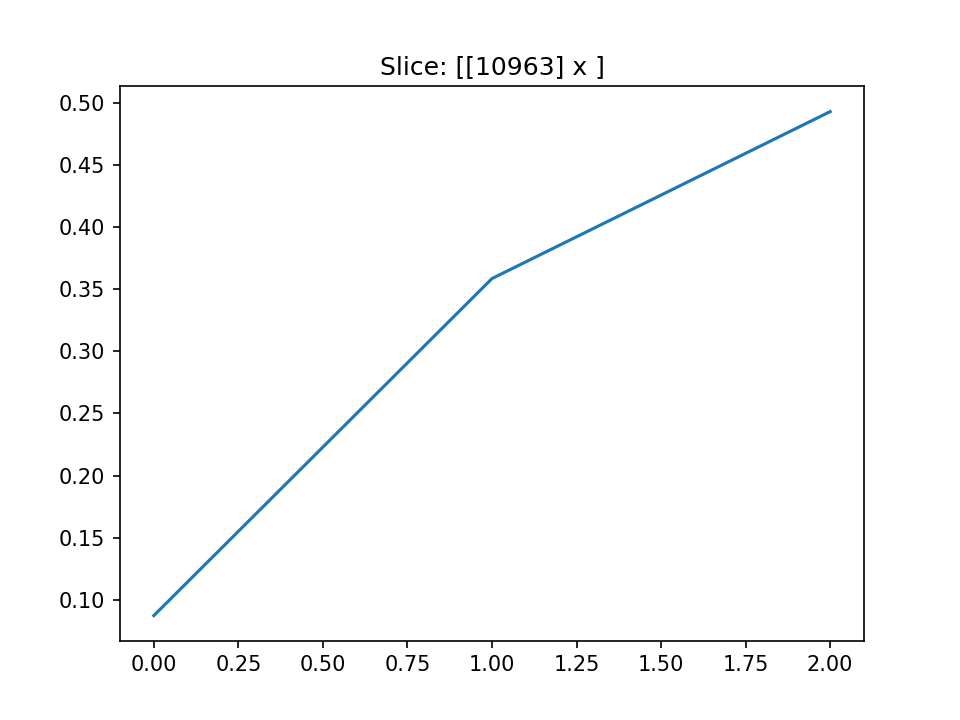

In [56]:
pl.LinePlot(dictionary_pca)

In [35]:
fp_train_1

array([[0.00812182, 0.00944535, 0.01044788, ..., 0.00621854, 0.00690465,
        0.00767356],
       [0.00719178, 0.00948191, 0.01054393, ..., 0.00627772, 0.00697027,
        0.00774634],
       [0.00719182, 0.00948195, 0.01054397, ..., 0.00627775, 0.0069703 ,
        0.00774637],
       ...,
       [0.03346432, 0.03641555, 0.03937593, ..., 0.0121684 , 0.0137765 ,
        0.01552572],
       [0.03335859, 0.0363005 , 0.03925149, ..., 0.01216448, 0.01377423,
        0.01552494],
       [0.03325693, 0.03618988, 0.03913182, ..., 0.01216081, 0.01377223,
        0.01552445]], dtype=float32)

<IPython.core.display.Javascript object>


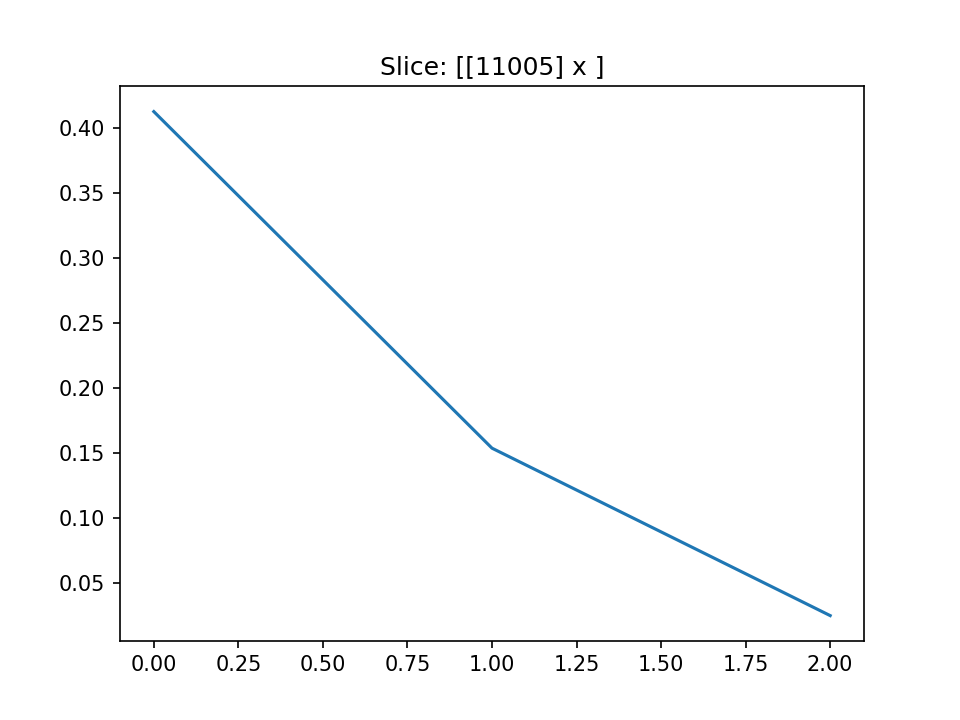

In [42]:
pl.LinePlot(dictionary_pca)

In [18]:
# Here we train the network
n_dictionary = 22031
n_dimension = 3
tau = 0.07
epochs = 10000
net = UFNet.PixelNet(1).cuda()

# net = UFNet.PixelNet(1).cuda()
optimizer = torch.optim.Adam(net.parameters(),
                          lr=0.02)
criterion = torch.nn.CrossEntropyLoss()
loss_all = list([])
index_dic = np.random.permutation(n_dictionary)
batchsize = 8
num = np.floor(n_dictionary/batchsize).astype(int)
net = UFNet.PixelNet(1).cuda()

for epoch in range(epochs):
    index_dic = np.random.permutation(n_dictionary)
    net.train()
    epoch_loss = 0
    optimizer.zero_grad()
    print("Starting Epoch: %d" %(epoch+1))
    for index in range(num):
        
        input_dic = fp_train_cuda[index*batchsize:(index+1)*batchsize,:,:]
        output_dic = net(input_dic)
        ipd = index_dic[index*batchsize:(index+1)*batchsize]

        ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
#             print(output_dic)
#             B_tensor_cuda.requires_grad = False
        output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
#             print(output_dic.requires_grad)
#             print(output_dic.shape)
        loss = criterion(output_dic1,torch.LongTensor(ipd).cuda())
        
        if index % 1000 == 0:
            print(loss.item())
            loss_all.append(loss.item())
        epoch_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
#         loss = criterion(output_dic1,torch.LongTensor([index]).cuda())
#         loss.backward()
#         if index % 1000 == 0:
#             print(loss.item())
#             loss_all.append(loss.item())
# #         if index >1:
# #             if index % 3000 == 0:
# #                 optimizer.zero_grad()
#         optimizer.step()
#         optimizer.zero_grad()
# #             if index % 1000 == 0:
# #                 print(loss.item())
# #         loss_all.append(loss.item())
#         epoch_loss += loss.item()
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        B_tensor_cuda[ipd,:] = output_dic.double()
#                     optimizer.step()
#     optimizer.zero_grad()
#     for index in range(n_dictionary):
#         input_dic = fp_train_cuda[index,:,:].unsqueeze(0)
#         output_dic = net(input_dic)
#         B_tensor_cuda[index,:] = output_dic


#         ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
# #             print(output_dic)
# #             B_tensor_cuda.requires_grad = False
#         output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
# #             print(output_dic.requires_grad)
# #             print(output_dic.shape)
#         loss = criterion(output_dic1,torch.LongTensor([index]).cuda())
#         loss.backward()
#         if index >1:
#             if index % 5000 == 0:
# #                 optimizer.zero_grad()
#                 optimizer.step()
#                 optimizer.zero_grad()
#             if index % 1000 == 0:
#                 print(loss.item())
#                 loss_all.append(loss.item())
#         epoch_loss += loss.item()
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         B_tensor_cuda[index,:] = output_dic
    print('Epoch finished ! Loss: {}'.format(epoch_loss / 22031))
    torch.save(net.state_dict(),
                       '/home/kewang/checkpoints_unf/' + 'CP{}.pth'.format(epoch + 1))
    np.save("loss_all.npy",np.array(loss_all))
    print('Checkpoint {} saved !'.format(epoch + 1))
# for index in range(num):
#         net.train()
#         input_dic = fp_train_cuda[index*batchsize:(index+1)*batchsize,:,:]
#         output_dic = net(input_dic)
#         ipd = index_dic[index*batchsize:(index+1)*batchsize]

#         ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
# #             print(output_dic)
# #             B_tensor_cuda.requires_grad = False
# #         output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
# #             print(output_dic.requires_grad)
# #             print(output_dic.shape)
# #         loss = criterion(output_dic,torch.LongTensor(ipd).cuda())
        
# #         if index % 20 == 0:
# #             print(loss.item())
# #             loss_all.append(loss.item())
# #         epoch_loss += loss.item()
# #         optimizer.zero_grad()
# #         loss.backward()
#         optimizer.step()
#         B_tensor_cuda[ipd,:] = output_dic.double()
        
        
# for epoch in range(epochs):
#     index_dic = np.random.permutation(n_dictionary)
#     net.train()
#     epoch_loss = 0
#     optimizer.zero_grad()
#     print("Starting Epoch: %d" %(epoch+1))
#     for index in range(num):
        
#         input_dic = fp_train_cuda[index*batchsize:(index+1)*batchsize,:,:]
#         output_dic = net(input_dic)
#         ipd = index_dic[index*batchsize:(index+1)*batchsize]

#         ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
# #             print(output_dic)
# #             B_tensor_cuda.requires_grad = False
#         output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
# #             print(output_dic.requires_grad)
# #             print(output_dic.shape)
#         loss = criterion(output_dic,torch.LongTensor(ipd).cuda())
        
#         if index % 20 == 0:
#             print(loss.item())
#             loss_all.append(loss.item())
#         epoch_loss += loss.item()
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
# #         loss = criterion(output_dic1,torch.LongTensor([index]).cuda())
# #         loss.backward()
# #         if index % 1000 == 0:
# #             print(loss.item())
# #             loss_all.append(loss.item())
# # #         if index >1:
# # #             if index % 3000 == 0:
# # #                 optimizer.zero_grad()
# #         optimizer.step()
# #         optimizer.zero_grad()
# # #             if index % 1000 == 0:
# # #                 print(loss.item())
# # #         loss_all.append(loss.item())
# #         epoch_loss += loss.item()
# #         optimizer.zero_grad()
# #         loss.backward()
# #         optimizer.step()
# #         B_tensor_cuda[ipd,:] = output_dic.double()
# #                     optimizer.step()
# #     optimizer.zero_grad()
# #     for index in range(n_dictionary):
# #         input_dic = fp_train_cuda[index,:,:].unsqueeze(0)
# #         output_dic = net(input_dic)
# #         B_tensor_cuda[index,:] = output_dic


# #         ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
# # #             print(output_dic)
# # #             B_tensor_cuda.requires_grad = False
# #         output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
# # #             print(output_dic.requires_grad)
# # #             print(output_dic.shape)
# #         loss = criterion(output_dic1,torch.LongTensor([index]).cuda())
# #         loss.backward()
# #         if index >1:
# #             if index % 5000 == 0:
# # #                 optimizer.zero_grad()
# #                 optimizer.step()
# #                 optimizer.zero_grad()
# #             if index % 1000 == 0:
# #                 print(loss.item())
# #                 loss_all.append(loss.item())
# #         epoch_loss += loss.item()
# #         optimizer.zero_grad()
# #         loss.backward()
# #         optimizer.step()
# #         B_tensor_cuda[index,:] = output_dic
#     print('Epoch finished ! Loss: {}'.format(epoch_loss / 22031))
#     torch.save(net.state_dict(),
#                        '/home/kewang/checkpoints_unf/' + 'CP{}.pth'.format(epoch + 1))
#     np.save("loss_all.npy",np.array(loss_all))
#     print('Checkpoint {} saved !'.format(epoch + 1))

Starting Epoch: 1
9.999202728271484
11.29763412475586
11.82718563079834
Epoch finished ! Loss: 1.422570584013082
Checkpoint 1 saved !
Starting Epoch: 2
9.999195098876953
9.998961448669434
10.003083229064941
Epoch finished ! Loss: 1.2496942301364877
Checkpoint 2 saved !
Starting Epoch: 3
10.000502586364746
9.999582290649414
9.999588966369629
Epoch finished ! Loss: 1.2496296408757452
Checkpoint 3 saved !
Starting Epoch: 4
10.002862930297852
9.99974536895752
10.000652313232422
Epoch finished ! Loss: 1.2496295875451313
Checkpoint 4 saved !
Starting Epoch: 5
9.999897003173828
10.000311851501465
10.00069522857666
Epoch finished ! Loss: 1.2496289165403844
Checkpoint 5 saved !
Starting Epoch: 6
9.99995231628418
9.99937915802002
9.99991512298584
Epoch finished ! Loss: 1.2496281983518962
Checkpoint 6 saved !
Starting Epoch: 7
9.999719619750977
9.999177932739258
10.000679969787598
Epoch finished ! Loss: 1.249629861210831
Checkpoint 7 saved !
Starting Epoch: 8
10.000503540039062
10.001120567321777

KeyboardInterrupt: 

In [ ]:
for epoch in range(epochs):
    index_dic = np.random.permutation(n_dictionary)
    net.train()
    epoch_loss = 0
    optimizer.zero_grad()
    print("Starting Epoch: %d" %(epoch+1))
    for index in range(num):
        
        input_dic = fp_train_cuda[index*batchsize:(index+1)*batchsize,:,:]
        output_dic = net(input_dic)
        ipd = index_dic[index*batchsize:(index+1)*batchsize]

        ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
#             print(output_dic)
#             B_tensor_cuda.requires_grad = False
        output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
#             print(output_dic.requires_grad)
#             print(output_dic.shape)
        loss = criterion(output_dic,torch.LongTensor(ipd).cuda())
        
        if index % 20 == 0:
            print(loss.item())
            loss_all.append(loss.item())
        epoch_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
#         loss = criterion(output_dic1,torch.LongTensor([index]).cuda())
#         loss.backward()
#         if index % 1000 == 0:
#             print(loss.item())
#             loss_all.append(loss.item())
# #         if index >1:
# #             if index % 3000 == 0:
# #                 optimizer.zero_grad()
#         optimizer.step()
#         optimizer.zero_grad()
# #             if index % 1000 == 0:
# #                 print(loss.item())
# #         loss_all.append(loss.item())
#         epoch_loss += loss.item()
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         B_tensor_cuda[ipd,:] = output_dic.double()
#                     optimizer.step()
#     optimizer.zero_grad()
#     for index in range(n_dictionary):
#         input_dic = fp_train_cuda[index,:,:].unsqueeze(0)
#         output_dic = net(input_dic)
#         B_tensor_cuda[index,:] = output_dic


#         ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
# #             print(output_dic)
# #             B_tensor_cuda.requires_grad = False
#         output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
# #             print(output_dic.requires_grad)
# #             print(output_dic.shape)
#         loss = criterion(output_dic1,torch.LongTensor([index]).cuda())
#         loss.backward()
#         if index >1:
#             if index % 5000 == 0:
# #                 optimizer.zero_grad()
#                 optimizer.step()
#                 optimizer.zero_grad()
#             if index % 1000 == 0:
#                 print(loss.item())
#                 loss_all.append(loss.item())
#         epoch_loss += loss.item()
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         B_tensor_cuda[index,:] = output_dic
    print('Epoch finished ! Loss: {}'.format(epoch_loss / 22031))
    torch.save(net.state_dict(),
                       '/home/kewang/checkpoints_unf/' + 'CP{}.pth'.format(epoch + 1))
    np.save("loss_all.npy",np.array(loss_all))
    print('Checkpoint {} saved !'.format(epoch + 1))

<IPython.core.display.Javascript object>


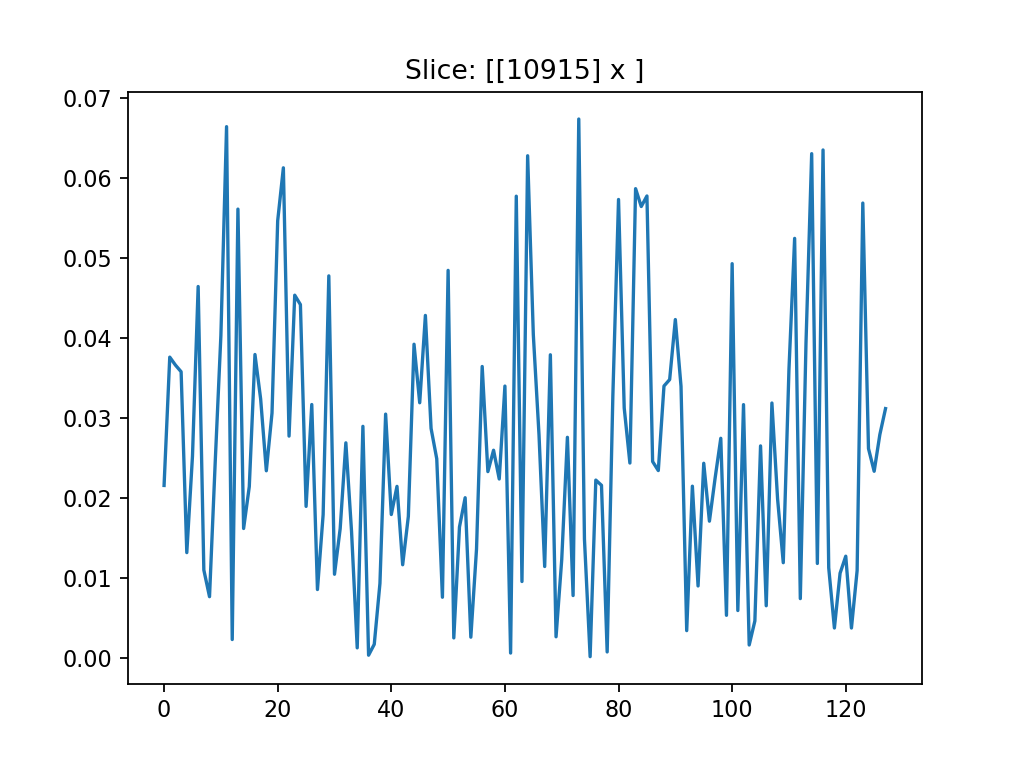

In [19]:
pl.LinePlot(B_tensor_cuda.detach().cpu().numpy())

In [13]:
index

256

In [22]:
print(index)

256


In [14]:
tau = 0.07

In [18]:
input_dic = fp_train_cuda[10000,:,:].unsqueeze(0)
output_dic = net(input_dic)

In [19]:
output_dic.argmax()

tensor(15911, device='cuda:0')

In [56]:
net = UFNet.PixelNet(1).cuda()

<IPython.core.display.Javascript object>


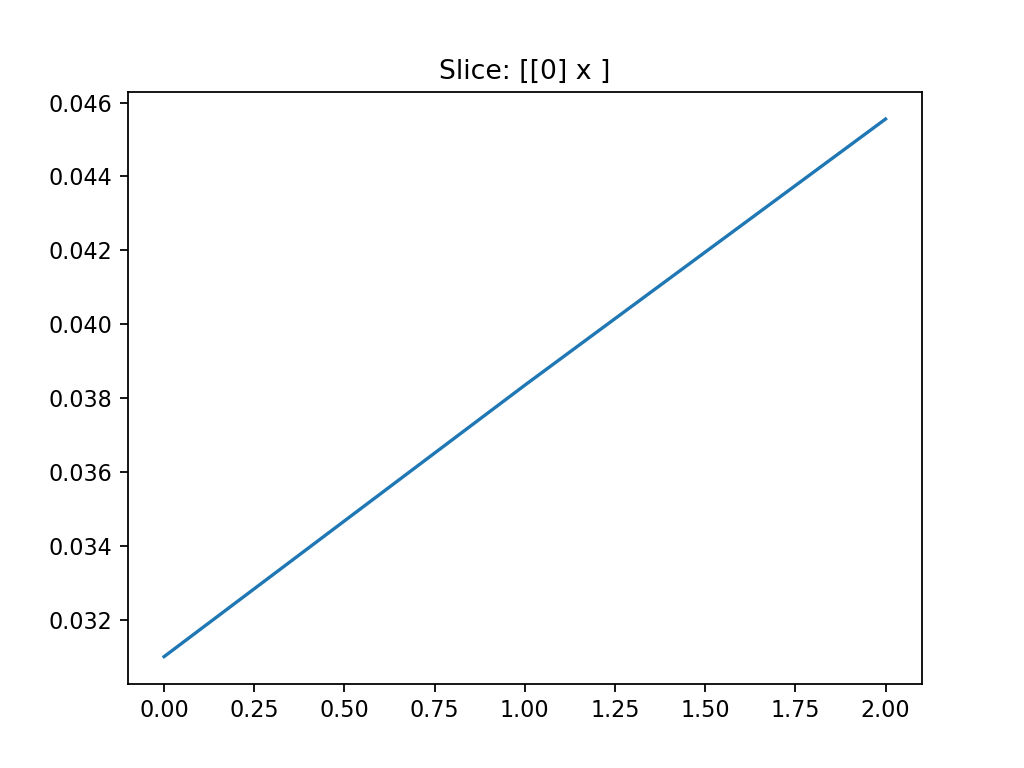

In [21]:
input_dic = fp_train_cuda[20000,:,:].unsqueeze(0)
output_dic = net(input_dic)
input_dic2 = fp_train_cuda[1000,:,:].unsqueeze(0)
output_dic2 = net(input_dic2)
b = output_dic.detach().cpu().numpy() - output_dic2.detach().cpu().numpy()
pl.LinePlot(b)
        ## error: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.
#             print(output_dic)
#             B_tensor_cuda.requires_grad = False
# output_dic1 = torch.mm(output_dic,B_tensor_cuda.detach().float().transpose(0,1))/tau
# #             print(output_dic.requires_grad)
# #             print(output_dic.shape)
# loss = criterion(output_dic1,torch.LongTensor([1000]).cuda())

In [37]:
loss.item()

8.09029769897461

<IPython.core.display.Javascript object>


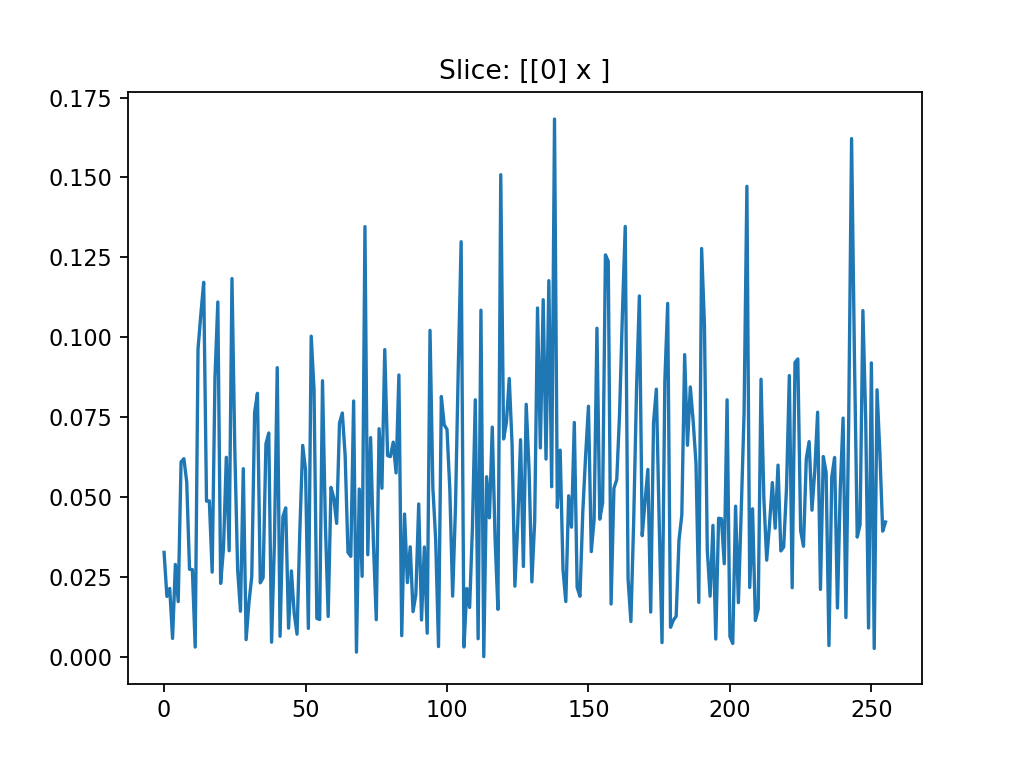

In [44]:
input_dic_test = fp_train_cuda[10000,:,:].unsqueeze(0)
output_dic_test = net(input_dic_test)
pl.LinePlot(output_dic_test.detach().cpu().numpy())
output_dic1_test = torch.mm(output_dic_test,B_tensor_cuda.detach().float().transpose(0,1))/tau
loss = cc(output_dic1_test,torch.LongTensor([20000]).cuda())
# output_dic1_test = torch.mm(output_dic_test,B_tensor_cuda.detach().float().transpose(0,1))/tau

In [43]:
loss

tensor(11.4399, device='cuda:0', grad_fn=<NllLossBackward>)

In [441]:
net_uf = UFNet.PixelNet(1)

In [442]:
net_ufcuda = net_uf.cuda()

In [289]:
input_dic_test = fp_train_cuda[500,:,:].unsqueeze(0)
output_dic_test = net_ufcuda(input_dic_test)
output_dic1_test = torch.mm(output_dic_test,B_tensor_cuda.detach().float().transpose(0,1))/tau

In [25]:
cc = nn.CrossEntropyLoss()

In [292]:
loss = cc(output_dic1_test,torch.LongTensor([500]).cuda())

In [478]:
fp_train.shape

(22031, 1, 500)

In [520]:
nt = UFNet.PixelNet(1)
nt.load_state_dict(torch.load("../checkpoints_unf/CP28.pth"))
nt0 = nt.cuda()
input_dic_test = fp_train_cuda[0,:,:].unsqueeze(0)
output_dic_test = net_ufcuda(input_dic_test)
output_dic1_test = torch.mm(output_dic_test,B_tensor_cuda.detach().float().transpose(0,1))/tau
loss = cc(output_dic1_test,torch.LongTensor([10000]).cuda())
# pl.LinePlot(B_tensor_cuda[5000,:].detach().cpu().float().numpy())

In [521]:
output_dic_test

tensor([[-0.0278, -0.0461, -0.0051, -0.0124, -0.0692,  0.0511,  0.0777,  0.0511,
          0.0567, -0.0022,  0.0076,  0.0045,  0.0049,  0.0321,  0.1048,  0.0309,
          0.0544, -0.0074, -0.0242,  0.0515,  0.0363,  0.0095,  0.0489,  0.0086,
          0.0490,  0.0192, -0.0337, -0.0077,  0.0684, -0.0242,  0.0626,  0.0815,
          0.0052,  0.0565, -0.0044,  0.0338,  0.0278,  0.0514, -0.0107,  0.1118,
         -0.0688, -0.0089, -0.0039,  0.0122,  0.1443,  0.1217,  0.0898,  0.0593,
          0.0437, -0.0194,  0.0074,  0.0447,  0.0516, -0.0468,  0.0496, -0.0541,
          0.0405,  0.1281, -0.0651, -0.0795,  0.0337,  0.0210, -0.0542, -0.0216,
          0.1200,  0.0169, -0.0289,  0.0526,  0.0012, -0.0061, -0.0118,  0.0770,
          0.1753,  0.0779,  0.1007,  0.0489,  0.0584, -0.0285,  0.0304, -0.0060,
          0.0087,  0.0344,  0.0186,  0.0361,  0.0037, -0.0170,  0.0988, -0.0226,
          0.1394,  0.0632, -0.0258,  0.0235,  0.0228,  0.0115,  0.0344, -0.0147,
         -0.0226,  0.0684,  

In [438]:
output_dic1_test.max()*tau

tensor(0.9967, device='cuda:0', grad_fn=<MulBackward0>)

In [439]:
B_tensor_cuda = B_tensor.cuda()

In [444]:
train_net(net_ufcuda,1000,1,0.03)

Starting Epoch: 1
11.231678009033203
6.898996353149414
6.962409019470215
6.873554229736328
6.893313407897949
6.816213607788086
6.804896354675293
5.760597229003906
5.20340633392334
5.425529479980469
5.1975555419921875
6.687837600708008
6.51987361907959
9.288898468017578
9.767376899719238
10.115033149719238
10.125466346740723
10.593745231628418
10.194001197814941
10.508931159973145
10.978161811828613
10.783696174621582
10.766740798950195
Epoch finished ! Loss: 8.061122632038577
Checkpoint 1 saved !
Starting Epoch: 2
20.588075637817383
5.318092346191406
6.355125427246094
6.360411643981934
6.7966413497924805
6.87518310546875
6.898260116577148
8.844487190246582
11.861841201782227
11.217596054077148
11.457673072814941
9.812807083129883
8.857461929321289
9.452831268310547
8.689266204833984
8.37021255493164
8.110657691955566
7.9531755447387695
7.798953056335449
7.5826005935668945
7.615848541259766
6.850124359130859
6.64406681060791
Epoch finished ! Loss: 7.967492470008192
Checkpoint 2 saved !


6.365297317504883
6.355071067810059
6.367959022521973
6.337217330932617
6.332459449768066
6.330414772033691
6.328373908996582
6.32525634765625
6.328667640686035
Epoch finished ! Loss: 6.362062752996278
Checkpoint 17 saved !
Starting Epoch: 18
6.329401969909668
6.345732688903809
6.342577934265137
6.359404563903809
6.3367109298706055
6.330753326416016
6.333625793457031
6.325104713439941
6.32119083404541
6.317575454711914
6.315333366394043
6.328916549682617
6.3058671951293945
6.315369606018066
6.3177385330200195
6.3071441650390625
6.322414398193359
6.28521728515625
6.281154632568359
6.278294563293457
6.278702735900879
6.273176193237305
6.274415969848633
Epoch finished ! Loss: 6.314306086956262
Checkpoint 18 saved !
Starting Epoch: 19
6.274829864501953
6.291385650634766
6.278451919555664
6.302734375
6.277644157409668
6.272641181945801
6.275668144226074
6.269293785095215
6.264781951904297
6.264098167419434
6.264013290405273
6.273113250732422
6.257872581481934
6.262814521789551
6.26803302764

KeyboardInterrupt: 

In [239]:
np.save("bank_003.npy",B_tensor_cuda.detach().cpu().numpy())

In [18]:
load = np.load("../unsupervised_fingerprinting/Bank.npy")

<IPython.core.display.Javascript object>


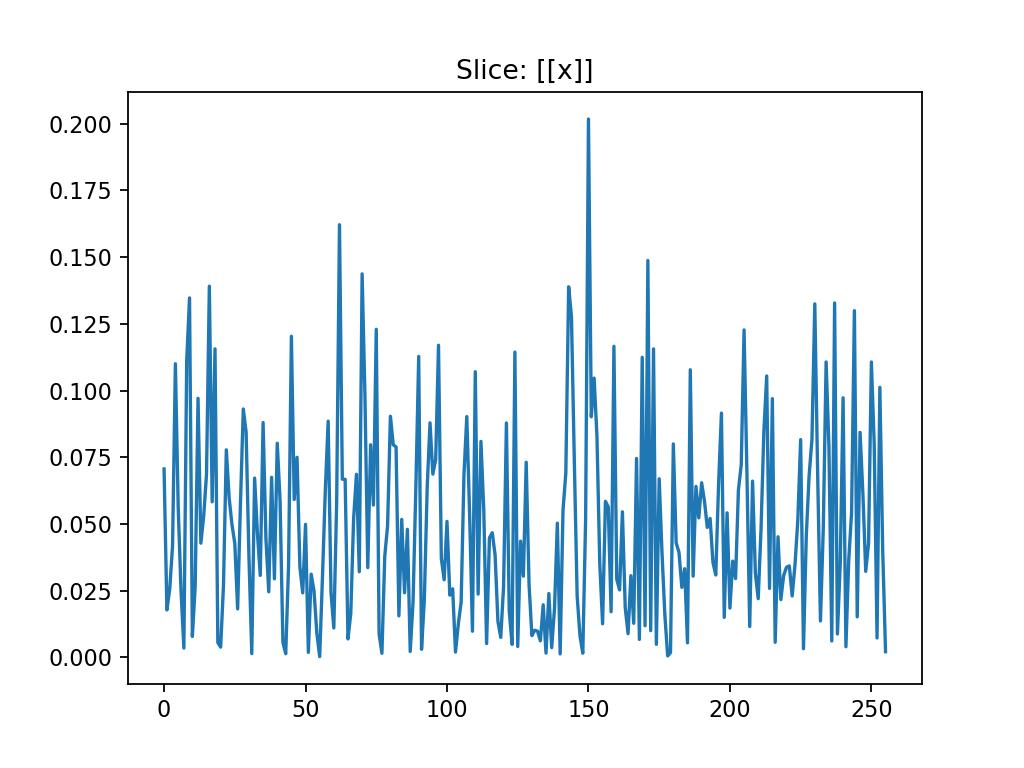

In [22]:
pl.LinePlot(load[100,:])

In [319]:
MRF_data = np.load("/home/kewang/Pytorch-UNet/data/augmented_data/MRF/MRF_norm_volunteer9_4.npy")

In [320]:
T1_mapping = np.load("/home/kewang/Pytorch-UNet/Fingerprinting/DictionaryAndSequenceInfo/T1_mapping.npy")
T2_mapping = np.load("/home/kewang/Pytorch-UNet/Fingerprinting/DictionaryAndSequenceInfo/T2_mapping.npy")

In [321]:
MRF_data.shape

(1000, 320, 320)

In [ ]:
pl.LinePlot()

In [406]:
signal = MRF_data[:,100,100]

In [407]:
SP_real = signal[:500][None,None,:]
SP_image = signal[500:][None,None,:]

In [408]:
SP = np.concatenate((SP_real,SP_image),1)

<IPython.core.display.Javascript object>


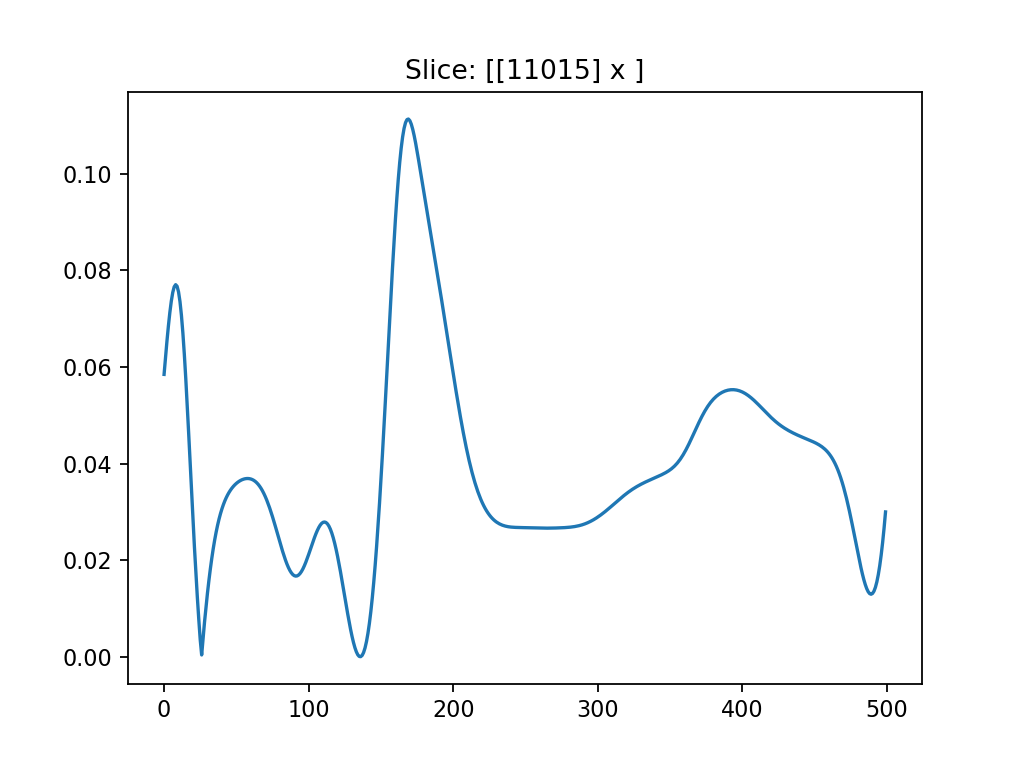

In [416]:
pl.LinePlot(fp_train[:,0,:]+1j*fp_train[:,1,:])

In [410]:
SP_t = torch.tensor(SP).cuda()

In [411]:
output_sp = nt0(SP_t)

In [412]:
output_sp1 = torch.mm(output_sp,B_tensor_cuda.detach().float().transpose(0,1))

In [413]:
output_sp1.shape

torch.Size([1, 22031])

In [414]:
output_sp1.argmax()

tensor(1126, device='cuda:0')

In [374]:
t1_t2_list = np.hstack((t1_list, t2_list)) # ms

In [380]:
t1_t2_list[1126,0]

96

In [377]:
T2_mapping[100,100]

98.0

<IPython.core.display.Javascript object>


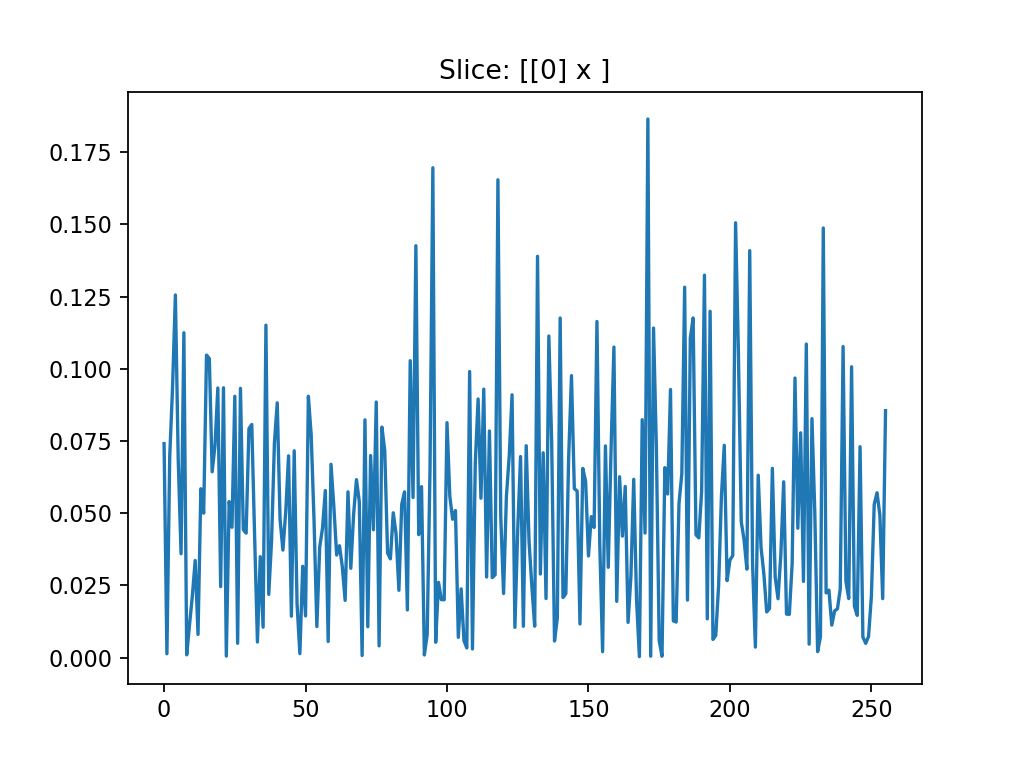

In [332]:
pl.LinePlot(output_sp.detach().cpu().numpy())

<IPython.core.display.Javascript object>


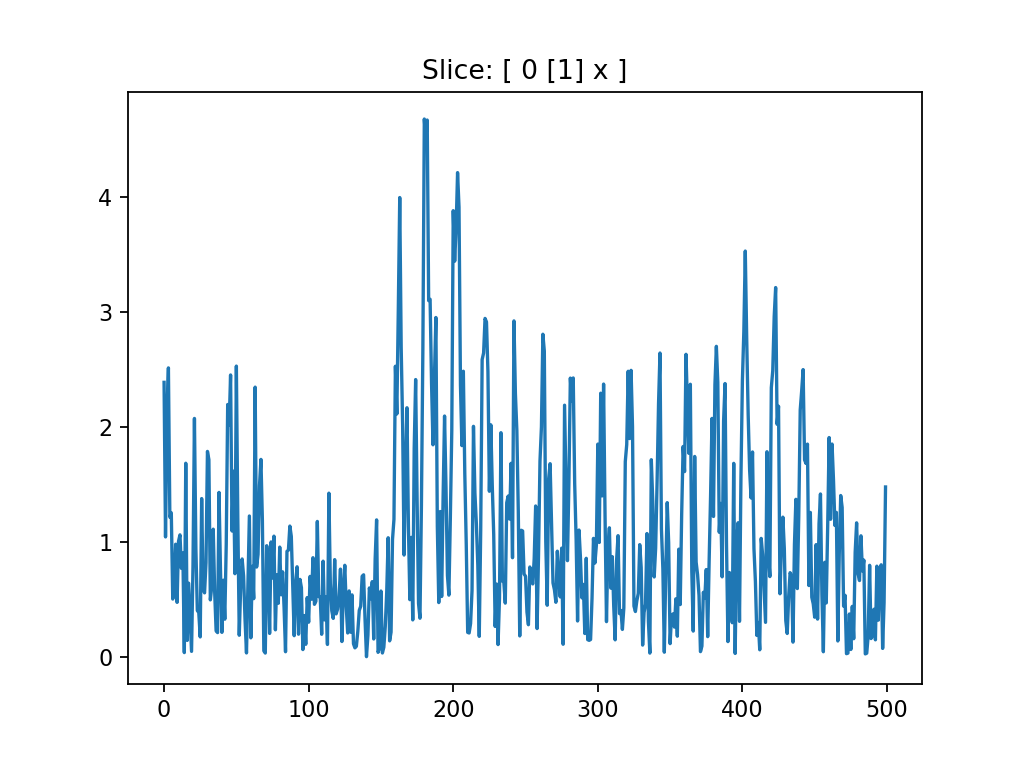

In [328]:
pl.LinePlot(SP)